In [1]:
from modsim import *

In [3]:
def make_system(T_init, volume, r, t_end):
    return System(T_init=T_init,
                  T_final=T_init, 
                  T_env=22, 
                  volume=volume, r=r, 
                  t_0=0, t_end=t_end,dt=1)

In [4]:
coffee = make_system(T_init=90, volume=300, r=0.01, t_end=30)
coffee

namespace(T_init=90,
          T_final=90,
          T_env=22,
          volume=300,
          r=0.01,
          t_0=0,
          t_end=30,
          dt=1)

In [5]:
def change_func(t, T, system):
    return -system.r * (T - system.T_env) * system.dt

In [6]:
change_func(0, coffee.T_init, coffee)

-0.68

In [8]:
def run_simulation(system, change_func):
    t_array = linrange(system.t_0, system.t_end, system.dt)
    n = len(t_array)
    series = TimeSeries(index=t_array)
    series.iloc[0] = system.T_init
    for i in range(n-1):
        t = t_array[i]
        T = series.iloc[i]
        series.iloc[i+1] = T + change_func(t, T, system)
    system.T_final = series.iloc[-1]
    return series  

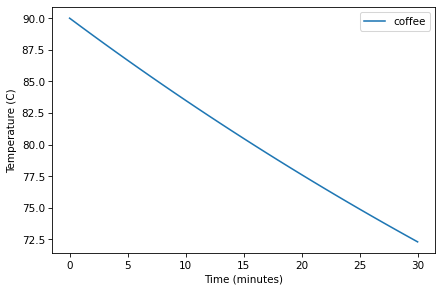

In [11]:
coffee_series = run_simulation(coffee, change_func)
coffee_series.plot(label='coffee')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')

In [12]:
coffee.T_final

np.float64(72.2996253904031)

In [13]:
def error_func(r, system):
    system.r = r
    results = run_simulation(system, change_func)
    return system.T_final - 70

In [14]:
coffee = make_system(T_init=90, volume=300, r=0.01, t_end=30)
error_func(0.01, coffee)

np.float64(2.2996253904030937)

In [15]:
error_func(0.02, coffee)

np.float64(-10.907066281994297)

In [16]:
res = root_scalar(error_func, coffee, bracket=[0.01, 0.02])
res

      converged: True
           flag: converged
 function_calls: 6
     iterations: 5
           root: 0.011543084190599507
         method: brentq

In [17]:
coffee.r = res.root
run_simulation(coffee, change_func)
coffee.T_final

np.float64(70.00000057308064)

In [ ]:
# Exercise 15.1
# Simulate the temperature of 50 mL of milk with a starting temperature of 5°C, 
# in a vessel with r=0.1, for 15 minutes, and plot the results. Use make_system 
# to make a System object that represents the milk, and use run_simulation to simulate it.
# By trial and error, find a value for r that makes the final temperature close to 20°C.

In [18]:
milk = make_system(T_init=5, volume=50, r=0.1, t_end=15)
run_simulation(milk, change_func)
milk.T_final

np.float64(18.499850754390966)

In [21]:
milk.r = 0.15
run_simulation(milk, change_func)
milk.T_final

np.float64(20.514978275278718)

In [22]:
def error_func_milk(r, system):
    system.r = r
    results = run_simulation(system, change_func)
    return system.T_final - 20

In [23]:
milk_res = root_scalar(error_func_milk, milk, bracket=[0.1, 0.2])
milk_res.root

0.1329607815660008

In [24]:
milk.r = milk_res.root
run_simulation(milk, change_func)
milk.T_final

np.float64(19.99999973050824)